In [1]:
import scvelo as scv
import os

In [13]:
import numpy as np

In [21]:
os.getcwd()

'/slurm/users/shaoxin/workspace/human_liver_ead/qc_nfeature200_4000_mt50/subtyping_tnk'

Filtered out 25163 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:13) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:09) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:09) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/192 cores)


  0%|          | 0/44799 [00:00<?, ?cells/s]

    finished (0:02:23) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:10) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


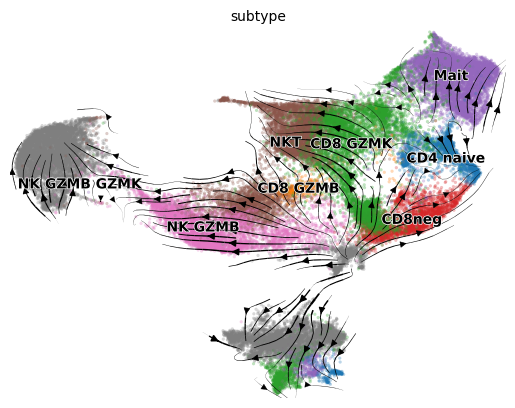

In [7]:
adata = scv.read("velocyto/obj_tnk_loom.h5ad")
adata
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, basis="umap", color="subtype")

In [18]:
adata.uns['subtype_colors'] = np.array(["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#bcbd22","#8c564b","#e377c2"])

saving figure to file ./velocyto.png


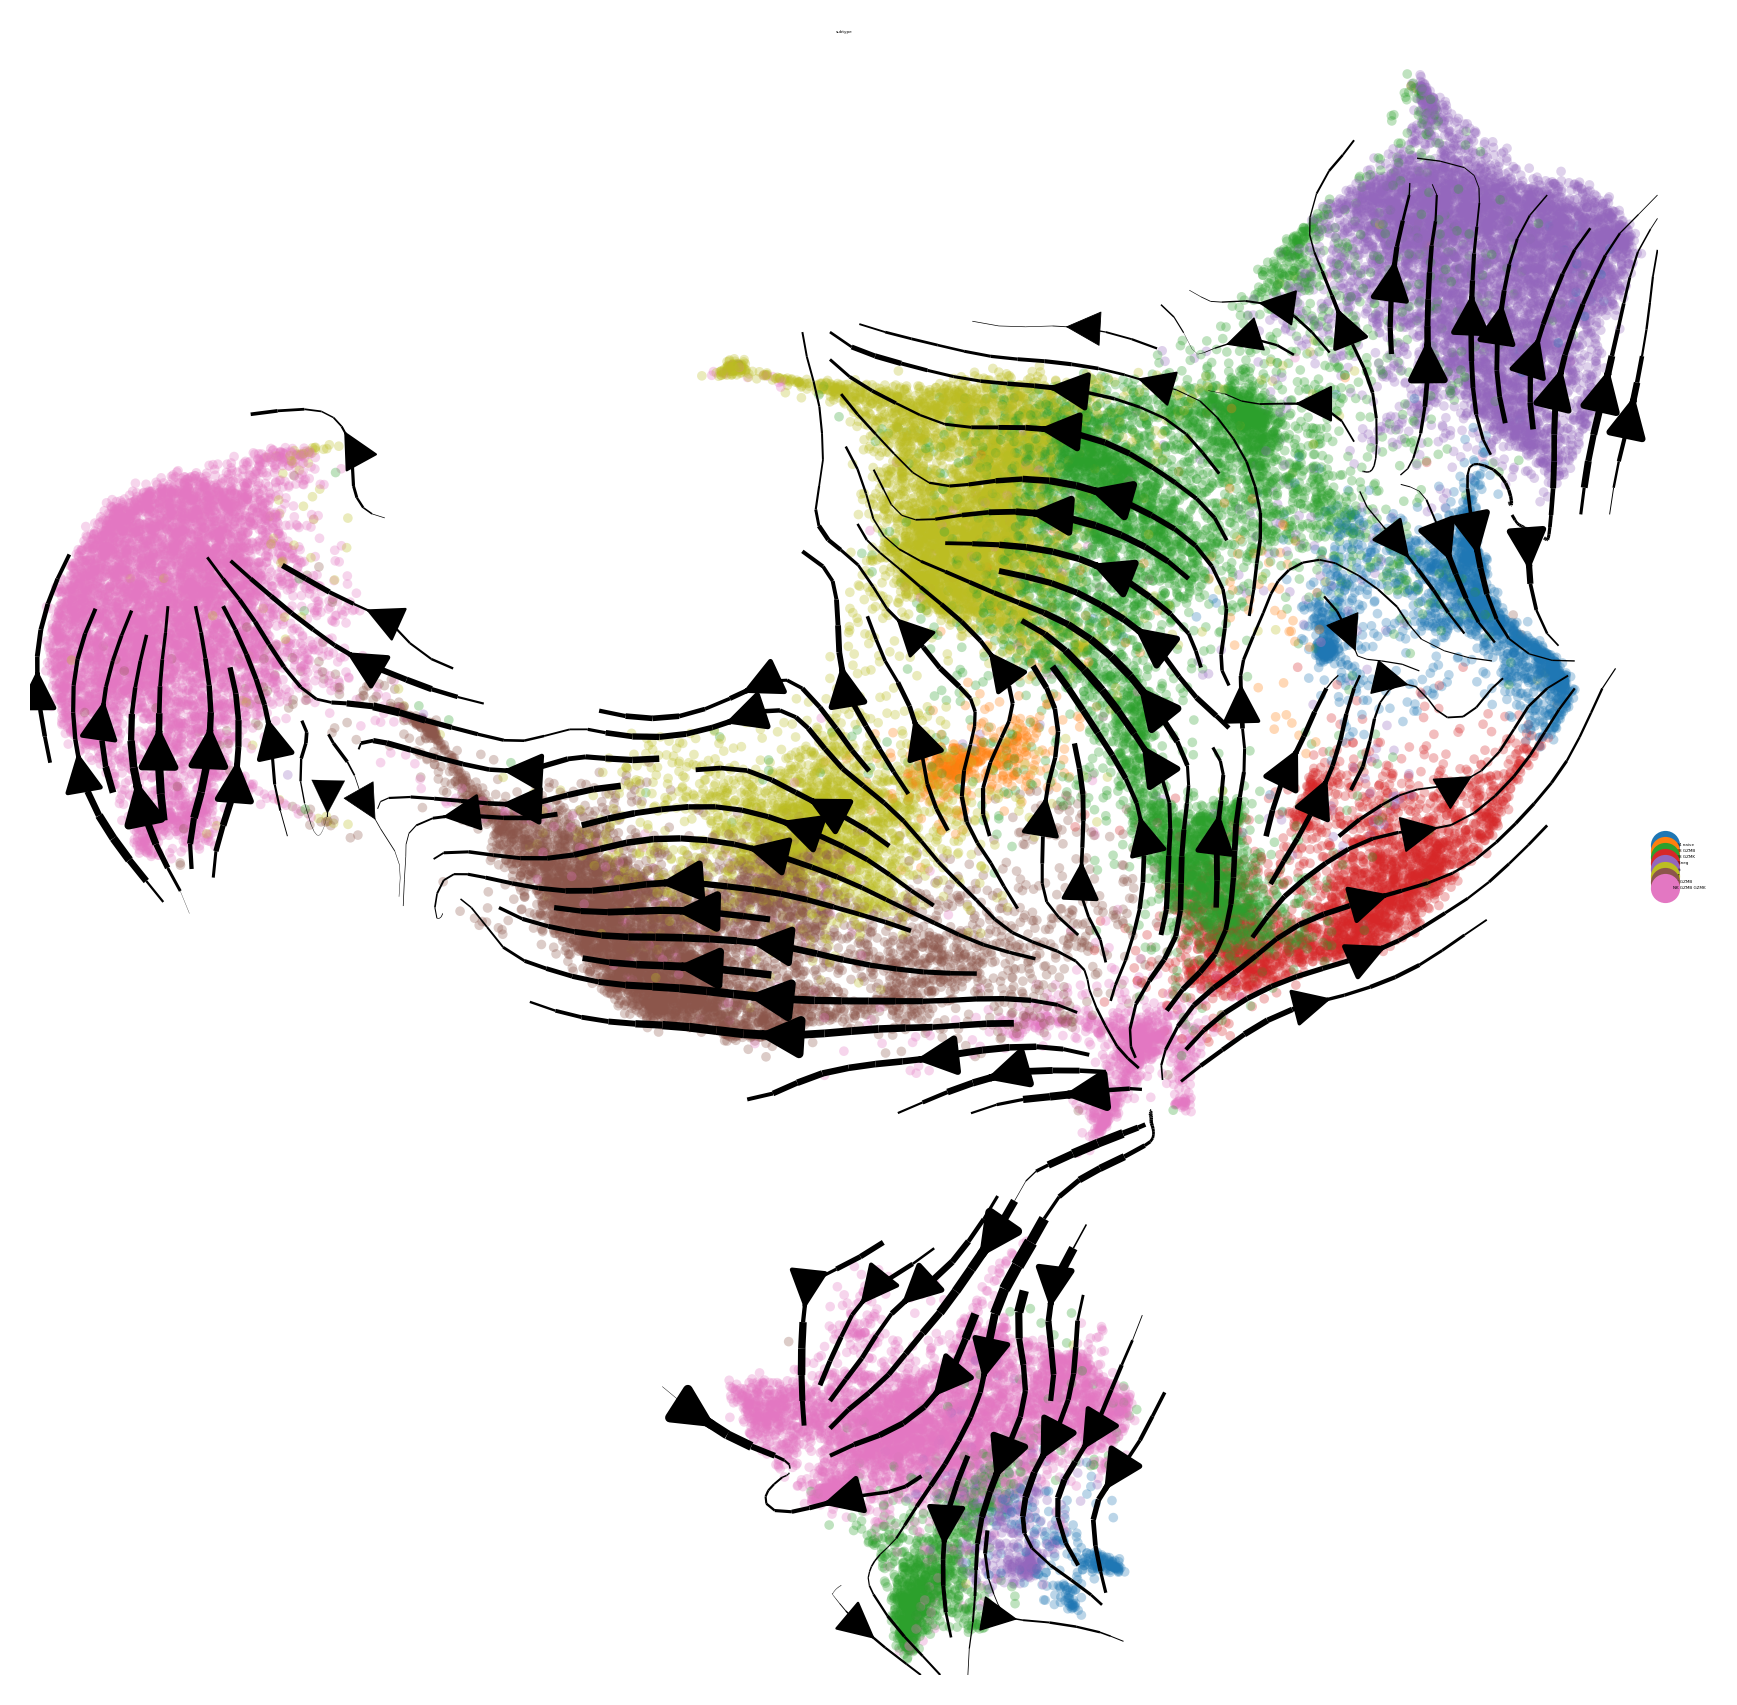

In [39]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="subtype",fontsize = -1, legend_fontsize = -1, legend_loc = "right margin",save = "./velocyto.png",
                                 dpi = 300,figsize = (7,7),arrow_size = 2,linewidth = 2)